# Estimating the background

In [1]:
import astropy
import starfinder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(starfinder.__version__)

0.1.dev13+g78f20f7.d20250204


In [2]:
%matplotlib ipympl

First, we set up a `starfield` instance passing in our example test data and then threshold the hot pixels

In [3]:
image_file = "data/ngc744-0001_60s_v.fit"
sf = starfinder.StarField(image_file)
sf.n_ij = sf.threshold_hot_pixels(sf.n_ij, 0.999)

INFO:starfinder:Reading file data/ngc744-0001_60s_v.fit


Now we can plot the data

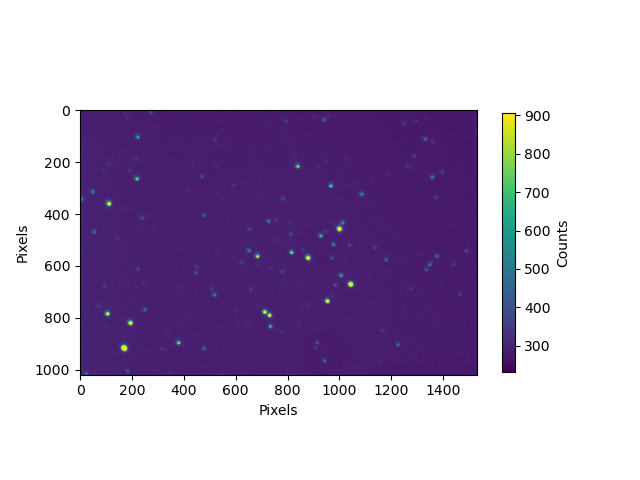

In [4]:
fig, ax = plt.subplots()
cbar = ax.imshow(sf.n_ij, origin="upper")
ax.set(xlabel="Pixels", ylabel="Pixels")
plt.colorbar(cbar, shrink=0.7, label="Counts")
plt.show()

The background in this image seems reasonably flat. However, it is useful to edit the scale of the plot to see that it is in fact not uniform

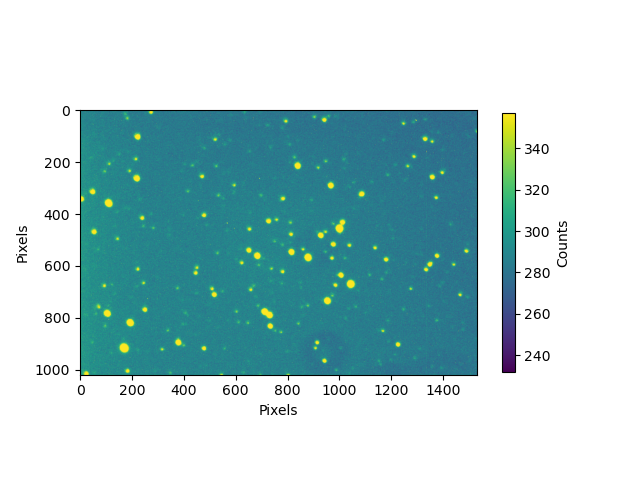

In [5]:
fig, ax = plt.subplots()
vmax = np.quantile(sf.n_ij, 0.99)
cbar = ax.imshow(sf.n_ij, origin="upper", vmax=vmax)
ax.set(xlabel="Pixels", ylabel="Pixels")
plt.colorbar(cbar, shrink=0.7, label="Counts")
plt.show()

Now, we can see that the background is very non-uniform. There is a bright edge on the left and an artefact in the middle-bottom.

**Note:** the use of `vmax` here is similar in spirit to the thresholding of hot pixels, but is only applied in the plotting.

We can estimate the background using `starfinder`:

In [6]:
sf.estimate_background(use_existing_background=False)

100%|█████████████████████████████████████████████████████████████████████████████████| 102/102 [00:07<00:00, 13.05it/s]


The background file is automatically created and saved to disk: it is *strongly* suggested you set `use_existing_background=True` to use the cached version of that rather than creating it each time.

The background is stored in an array `sf.b_ij` and we can plot it:

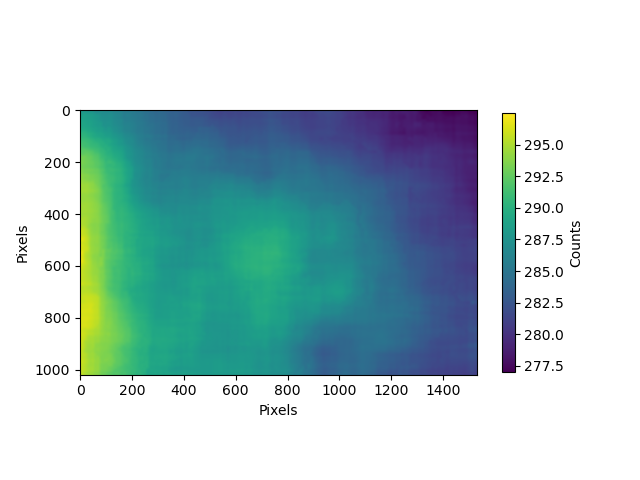

In [7]:
fig, ax = plt.subplots()
cbar = ax.imshow(sf.b_ij, origin="upper")
ax.set(xlabel="Pixels", ylabel="Pixels")
plt.colorbar(cbar, shrink=0.7, label="Counts")
plt.show()

Now, we can plot the residual of the data with the background subtracted as follows:

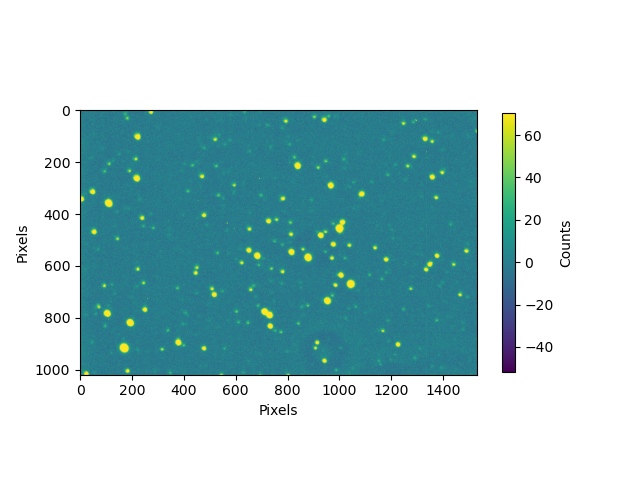

In [8]:
residual = sf.n_ij - sf.b_ij

fig, ax = plt.subplots()
vmax = np.quantile(residual, 0.99)
cbar = ax.imshow(residual, origin="upper", vmax=vmax)
ax.set(xlabel="Pixels", ylabel="Pixels")
plt.colorbar(cbar, shrink=0.7, label="Counts")
plt.show()

This improves removes much of the non-uniform background (though we note that the circular artefact remains)